<a href="https://colab.research.google.com/github/engineer-br0/Sign-language-Detection/blob/main/book1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print("Checkpoint 1")
import cv2
print("Checkpoint 2")
import numpy as np
print("Checkpoint 3")
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
from tensorflow.keras.utils import to_categorical  # Import to_categorical from tensorflow.keras.utils
from sklearn.model_selection import train_test_split
print("Checkpoint 4")

Checkpoint 1
Checkpoint 2
Checkpoint 3
TensorFlow version: 2.15.0
Checkpoint 4


In [ ]:
data_path_test = "/content/drive/MyDrive/ColabNotebooks/asl_alphabet_test/asl_alphabet_test"
data_path_train = "/content/drive/MyDrive/ColabNotebooks/asl_alphabet_train"

# Get the classes (letters) from the folder names
classes_train = sorted(os.listdir(data_path_train))
classes_test = sorted(os.listdir(data_path_test))
print("classes_train", classes_train)
print("classes_test",classes_test)

#print(os.listdir(data_path_train))

# Combine train and test classes (assuming they are the same)
classes = classes_train
#print("classes", enumerate(classes))

# Initialize lists to store images and labels
images = []
labels = []

# Load training data
#print(os.path.join(data_path_train, class_name))
for label, class_name in enumerate(classes):
    #print("label, class_name", label, class_name)
    class_path = os.path.join(data_path_train, class_name)
    #print(class_path)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
        # Resize the image
          image = cv2.resize(image, (64, 64))
          images.append(image)
          labels.append(label)
        else:
          print("Error: Empty or invalid image.")

# Convert lists to NumPy arrays
# print(images[0])
images_train = np.array(images) / 255.0
labels_train = to_categorical(labels, num_classes=len(classes))
print("labels_train", labels_train)
# Load test data
images = []  # Clear the list for test data
labels = []  # Clear the list for test data

for label, class_name in enumerate(classes):
    print(label, class_name)
    #class_path = os.path.join(data_path_test, class_name)
    class_path = os.path.join(data_path_test)
    print("class_path",class_path)
    #####
    image_name = classes_test[label]
    print("image_name", image_name)
    image_path = os.path.join(class_path, image_name)
    print("image_path", image_path)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
    # Resize the image
     image = cv2.resize(image, (64, 64))
     images.append(image)
     labels.append(label)
     print("labelis", label)
    else:
      print("Error: Empty or invalid image.")
        #image = cv2.resize(image, (64, 64))
    # for image_name in os.listdir(class_path):
    #     image_path = os.path.join(class_path, image_name)
    #     print("image_path", image_path)
    #     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #     if image is not None:
    #     # Resize the image
    #       image = cv2.resize(image, (64, 64))
    #       images.append(image)
    #       labels.append(label)
    #     else:
    #       print("Error: Empty or invalid image.")
    #     #image = cv2.resize(image, (64, 64))


# Convert lists to NumPy arrays
images_test = np.array(images) / 255.0
labels_test = to_categorical(labels, num_classes=len(classes))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.2, random_state=42)


classes_train ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
classes_test ['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg', 'F_test.jpg', 'G_test.jpg', 'H_test.jpg', 'I_test.jpg', 'J_test.jpg', 'K_test.jpg', 'L_test.jpg', 'M_test.jpg', 'N_test.jpg', 'O_test.jpg', 'P_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'S_test.jpg', 'T_test.jpg', 'U_test.jpg', 'V_test.jpg', 'W_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'Z_test.jpg', 'del_test.jpg', 'nothing_test.jpg', 'space_test.jpg']
labels_train [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
0 A
class_path /content/drive/MyDrive/ColabNotebooks/asl_alphabet_test/asl_alphabet_test
image_name A_test.jpg
image_path /content/drive/MyDrive/ColabNotebooks/asl_alphabet_test/asl_alphabet_test/A_test.jpg
labelis 0
1 B
class_

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("model", model)
    return model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# from build_model import build_model
from tensorflow.keras.callbacks import ModelCheckpoint

# Load preprocessed data
#X_train, X_test, y_train, y_test = np.load("preprocessed_data.npy")

# Create and compile the model
num_classes = len(np.unique(y_train))
model = build_model(num_classes=len(np.unique(np.argmax(y_train, axis=1))))

# Train the model
model.fit(X_train.reshape(-1, 64, 64, 1), y_train, validation_data=(X_test.reshape(-1, 64, 64, 1), y_test), epochs=50, batch_size=100)
# Example output layer

# Save the model
model.save("sign_language_detector_model.h5")


model <keras.src.engine.sequential.Sequential object at 0x789d6f4a73a0>
Epoch 1/10
73/73 [==============================] - 17s 202ms/step - loss: 2.3769 - accuracy: 0.4189 - val_loss: 0.7934 - val_accuracy: 0.7715
Epoch 2/10
73/73 [==============================] - 14s 189ms/step - loss: 0.3457 - accuracy: 0.9166 - val_loss: 0.1829 - val_accuracy: 0.9605
Epoch 3/10
73/73 [==============================] - 13s 179ms/step - loss: 0.0713 - accuracy: 0.9858 - val_loss: 0.0599 - val_accuracy: 0.9897
Epoch 4/10
73/73 [==============================] - 13s 172ms/step - loss: 0.0225 - accuracy: 0.9974 - val_loss: 0.0228 - val_accuracy: 0.9966
Epoch 5/10
73/73 [==============================] - 14s 192ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9966
Epoch 6/10
73/73 [==============================] - 16s 215ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 7/10
73/73 [==============================] - 15s 202ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Welcome to Sign Language Detector!
Instructions:
1. Place your hand in front of the camera.
2. Try different sign language gestures.
3. Press 'q' to exit the application.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 111ms/step
Raw Predictions: [[1.6313941e-04 2.1881926e-06 3.2679873e-04 1.9409399e-06 1.1330997e-03
  1.0154976e-04 2.6651724e-05 4.5797274e-06 1.6416008e-06 6.2123873e-10
  1.3694821e-08 5.0792173e-03 3.5880161e-09 6.7055215e-09 9.4273090e-01
  1.4733724e-04 4.7200191e-04 6.7998542e-08 6.9761413e-08 4.3686155e-02
  2.8196380e-03 3.5274322e-06 9.0522067e-13 1.4069310e-07 1.2165554e-14
  3.2266784e-03 7.2612900e-05 1.0586955e-09 2.2446893e-09]]
Predicted: O


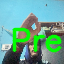

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 27ms/step
Raw Predictions: [[1.0422239e-02 9.8246051e-07 1.3809766e-07 8.3872372e-08 3.4394921e-05
  2.3645215e-02 1.3673190e-02 1.9122474e-01 2.1715239e-02 7.4925392e-06
  1.7555783e-07 4.8426271e-05 4.7263765e-10 1.9274176e-09 2.4243554e-01
  1.5119073e-04 2.7761808e-01 3.4903402e-10 1.2423051e-12 1.3560730e-01
  2.6812004e-02 4.9946837e-02 1.5652953e-12 4.9179466e-06 4.7897619e-12
  6.6497787e-03 2.0677237e-06 6.8317463e-14 3.3340142e-10]]
Predicted: Q


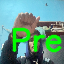

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
Raw Predictions: [[5.1771015e-01 9.3473401e-03 4.5779142e-10 3.3972165e-11 8.2454435e-04
  7.9457413e-06 2.6167406e-02 9.5218502e-06 5.4476957e-12 9.5003161e-10
  5.2764420e-07 6.5148743e-06 4.4435617e-01 2.3191505e-04 1.0870543e-03
  4.5407844e-05 1.8871433e-04 4.2494827e-11 1.5337033e-08 3.1320233e-10
  1.6592503e-05 8.9537622e-09 2.2130255e-10 1.8022972e-12 2.9604968e-10
  2.5819167e-09 3.0375650e-11 4.4624704e-13 1.2543300e-07]]
Predicted: A


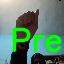

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 29ms/step
Raw Predictions: [[1.4037240e-03 1.5419516e-07 2.7351910e-09 8.0608013e-05 3.8827458e-10
  7.4608255e-07 1.5274824e-03 4.1743857e-01 4.2273185e-11 4.6042974e-06
  2.1436321e-12 3.5837310e-08 5.7901579e-01 3.6733102e-08 1.3901030e-05
  1.4049762e-04 3.7223688e-07 1.2312644e-11 3.0764398e-11 1.2490641e-07
  5.0869792e-10 1.3135570e-15 2.4122541e-14 1.1277245e-12 1.0856880e-11
  1.4879792e-10 5.9030764e-08 1.3014315e-12 3.7333614e-04]]
Predicted: M


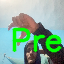

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 34ms/step
Raw Predictions: [[7.5959579e-06 1.0577244e-02 1.7500517e-08 2.1851666e-10 1.8961208e-10
  2.3917144e-07 9.7948325e-01 2.7625865e-04 3.1025845e-11 1.1461336e-06
  8.5080843e-15 7.3517752e-09 6.1261239e-03 1.8453522e-05 2.9647029e-07
  1.3838650e-10 1.5128715e-12 4.5622485e-11 2.3158048e-14 4.0803758e-07
  9.9063445e-06 5.7492662e-07 2.9045823e-06 5.7355283e-08 4.0221469e-08
  6.7977882e-13 2.5188039e-13 3.9904418e-16 3.4953835e-03]]
Predicted: G


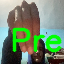

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 36ms/step
Raw Predictions: [[1.0451214e-02 1.3473485e-01 1.9344514e-03 4.5514750e-04 1.1332438e-08
  4.2920378e-06 4.6139602e-03 8.2314610e-01 1.0396336e-15 7.8723907e-09
  1.1623062e-08 1.0270845e-04 4.5838815e-06 7.9820356e-10 1.2328182e-03
  1.4227124e-02 2.0855764e-07 4.2607303e-11 1.0334882e-09 1.4616313e-08
  9.0054385e-03 1.5066405e-07 2.4198144e-14 2.5110256e-07 1.2296281e-14
  3.8098634e-08 4.9103509e-11 4.1323913e-11 8.6627129e-05]]
Predicted: H


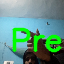

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
Raw Predictions: [[4.61041418e-05 1.49768468e-07 2.24664382e-06 2.73843198e-05
  9.83591875e-10 4.75472916e-12 1.52154667e-09 2.27483770e-06
  1.24952615e-14 3.23833495e-11 1.89785035e-10 1.84926046e-06
  9.94583428e-01 7.96054422e-09 1.07772439e-06 7.12784589e-04
  7.60660979e-11 2.47679282e-07 1.69300532e-04 6.47810028e-09
  8.64045376e-07 4.09695818e-15 2.55611981e-12 4.87329274e-11
  1.26825362e-12 2.10066787e-07 2.23126176e-06 1.81569214e-06
  4.44808602e-03]]
Predicted: M


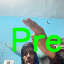

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
Raw Predictions: [[9.3280555e-08 2.9519509e-08 6.5609256e-09 4.6112815e-11 3.8793132e-11
  4.6416482e-10 7.8141703e-08 9.9988210e-01 1.8608564e-15 4.5539501e-12
  3.4432401e-14 5.3521837e-10 1.2527704e-15 6.8287254e-17 2.6247532e-08
  5.4300621e-05 1.4187077e-07 1.4572978e-14 6.2724411e-17 5.2642713e-07
  1.3350602e-05 4.9287100e-05 5.7218770e-16 6.2645189e-12 4.4917697e-16
  5.7716354e-10 4.8602788e-10 5.6067497e-18 1.9350285e-08]]
Predicted: H


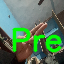

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 27ms/step
Raw Predictions: [[1.5755888e-02 1.2247636e-05 4.2892270e-07 3.8711747e-07 5.9418075e-05
  4.5587978e-05 3.5072034e-04 2.1869574e-04 4.7703805e-05 5.9862421e-10
  1.2839904e-07 1.5805257e-03 2.3402580e-09 5.0721454e-08 3.1290561e-01
  9.1286001e-06 5.3852092e-04 1.1602952e-07 8.0189611e-10 8.5981619e-03
  1.5517704e-01 1.9014066e-02 1.9326497e-11 2.1455382e-06 4.6572060e-12
  4.8568153e-01 1.6752390e-06 1.3021217e-10 1.5281232e-07]]
Predicted: Z


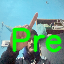

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step
Raw Predictions: [[3.4381679e-01 2.4392452e-10 3.8667717e-05 4.4836383e-09 3.6592283e-03
  4.8873090e-04 8.5088005e-04 1.1117778e-06 1.2486667e-09 2.7803749e-11
  5.3697962e-09 4.6858113e-02 4.4984940e-08 7.6090248e-07 8.7785311e-03
  5.8912724e-01 6.0174926e-03 2.6525957e-08 1.3637056e-12 3.4871409e-04
  1.7781144e-06 1.2019700e-09 8.8510609e-18 1.4354463e-11 9.1701574e-15
  1.1608969e-05 2.7425972e-07 1.4722137e-11 1.3677630e-10]]
Predicted: P


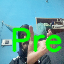

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 27ms/step
Raw Predictions: [[4.7927319e-05 5.0937462e-07 7.5013648e-11 6.6730048e-09 6.6899415e-09
  6.0518675e-02 6.6577115e-05 5.4911277e-03 1.7693748e-05 1.3370679e-08
  1.1321944e-09 3.5921683e-09 6.7232875e-04 7.7707952e-08 7.8142263e-02
  4.8973798e-05 8.5498619e-01 1.4773558e-09 1.3261933e-10 3.2261741e-07
  5.4618138e-10 8.7529185e-12 2.0344407e-13 7.5703904e-10 1.2568330e-08
  2.8300033e-06 1.1339521e-06 2.4209415e-12 3.2717908e-06]]
Predicted: Q


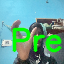

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 28ms/step
Raw Predictions: [[3.3737535e-05 3.6826344e-09 1.5891218e-17 3.0279709e-12 3.2755905e-09
  1.3624146e-04 7.7598220e-01 2.2338271e-01 5.8005351e-11 3.8765186e-10
  1.3867260e-13 8.6559986e-08 3.0347320e-07 4.8819532e-10 4.6427327e-04
  8.7642576e-08 7.8563275e-08 4.4996121e-17 1.2464425e-22 2.4163657e-07
  2.8944079e-15 1.2955426e-09 7.6676323e-16 7.6892418e-18 5.8130135e-16
  1.0349034e-14 5.1513657e-14 1.2137318e-25 6.5744084e-15]]
Predicted: G


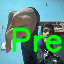

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

# Function to capture a photo using Colab's webcam snippet
def take_photo(quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({ video: true });

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    image = cv2.imdecode(np.frombuffer(binary, dtype=np.uint8), -1)
    return image

# Load the trained model
model = load_model("sign_language_detector_model.h5")

# Create a list of class labels
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# Display instructions
instructions = [
    "Welcome to Sign Language Detector!",
    "Instructions:",
    "1. Place your hand in front of the camera.",
    "2. Try different sign language gestures.",
    "3. Press 'q' to exit the application."
]

for instruction in instructions:
    print(instruction)

while True:
    # Capture a frame from the camera or a photo
    try:
        frame = take_photo()
    except Exception as e:
        print(f"Error capturing photo: {e}")
        break

    # Preprocess the frame (resize, convert to grayscale, normalize)
    # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #     if image is not None:
    #     # Resize the image
    #       image = cv2.resize(image, (64, 64))
    #       images.append(image)
    #       labels.append(label)
    frame = cv2.resize(frame, (64, 64))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    normalized_frame = gray_frame / 255.0
    input_data = normalized_frame.reshape((-1, 64, 64, 1))

    # Make predictions using the model
    predictions = model.predict(input_data)
    predicted_class = classes[np.argmax(predictions)]

    # Print raw predictions
    print("Raw Predictions:", predictions)

    # Display the predicted class on the frame
    cv2.putText(frame, f"Predicted: {predicted_class}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    print(f"Predicted: {predicted_class}")
    # Display instructions on the frame
    y = 80
    for instruction in instructions:
        cv2.putText(frame, instruction, (10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        y += 20

    # Display the frame
    cv2_imshow(frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cv2.destroyAllWindows()


# New Section